<a href="https://colab.research.google.com/github/janiesilva/data_science/blob/master/seguranca_rj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### **Violência no Rio de Janeiro - um novo olhar sobre os dados**
*by [Janie silva](https://www.linkedin.com/in/janie-silva-7501ba142/)*

---

Até bem pouco tempo atrás, a gestão a partir de dados era um privilégio de empresas privadas, que viviam em um nicho muito específico de acesso à informação e acompanhamento de performance por indicadores. 

A chamada era da informação chegou aos mais variados setores, e hoje trago um contraponto interessante a essa realidade vivenciada recentemente, na qual o governo do Rio de Janeiro optou por catalogar e deixar disponíveis para visualização os dados da violência estadual. O artigo de hoje tem como objetivo utilizar os dados disponíveis na plataforma do portal [ISP Dados](http://www.ispdados.rj.gov.br/), trazendo uma análise sobre a criminalidade no Rio de Janeiro e contribuir com o bom trabalho que o Instituto de Segurança tem feito ao disseminar os dados entre a população mostrando que é possível democratizar o acesso à informação!



## Obtenção dos dados

Os dados foram obtidos diretamento do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

No caso do dataset a ser utilizado aqui, o arquivo csv pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

In [105]:
#importando os dados e os pacotes a serem utilizados

DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv"

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


df = pd.read_csv(DATA_PATH)
df

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2


## Análise de dados

Em uma primeira observação, é possível notar que a estrutura do arquivo relata os registros (linhas) por mês x ano de cada tipo de ocorrência (colunas).
Sabemos que o arquivo tem 344 registros e 56 colunas, é importante listar todas as variáveis do dataset, para entendermos melhor do que se trata a base e pensarmos de forma mais profunda em como as análises podem ser desenvolvidas.


In [ ]:
# verificando as colunas do dataframe

df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Entre as colunas, é possível inferir a natureza de alguns dos elementos, como *furto_veiculos*, enquanto outros são menos dedutíveis, como *apf*. Na tentativa de nos ajudar desbravar o dataset, vamos ver o tipo de cada uma das variáveis a seguir:

In [ ]:
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Todas as variáveis são numéricas, do tipo `int` ou `float`, o que abre vasta gama de possíveis tratamentos nesse dataset. No entanto, foi observado na primeira abertura do dataset a ocorrência de valores ausentes. 

Vamos verificar o quanto eles representam no nosso conjunto de dados?

In [ ]:
df2 = df.isnull().sum()/df.shape[0]
df2.sort_values()

vano                          0.000000
indicador_roubo_veic          0.000000
indicador_roubo_rua           0.000000
indicador_letalidade          0.000000
encontro_cadaver              0.000000
recuperacao_veiculos          0.000000
apreensao_drogas              0.000000
total_furtos                  0.000000
outros_furtos                 0.000000
furto_transeunte              0.000000
furto_veiculos                0.000000
total_roubos                  0.000000
outros_roubos                 0.000000
roubo_banco                   0.000000
roubo_em_coletivo             0.000000
fase                          0.000000
roubo_carga                   0.000000
roubo_veiculo                 0.000000
mes                           0.000000
roubo_transeunte              0.000000
hom_doloso                    0.000000
lesao_corp_dolosa             0.000000
latrocinio                    0.000000
roubo_residencia              0.000000
roubo_comercio                0.000000
tentat_hom               

Apesar de valores em branco serem um fator relacionado à baixa qualidade em uma base de dados, no caso do nosso conjunto isso pode ser entendido como a não-ocorrência de um registro dessa modalidade de crime.

Observando as variáveis com maior volume de linhas em branco (como `roubo_bicicleta`), uma possível interpretação para esse fenômeno é o fato de as pessoas não reportam esse tipo de violência da mesma forma que reportam as demais - tidas mais graves - causando esse desbalanço.
Outra hipótese a ser considerada é a de que nossa base de dados considera uma linha do tempo relativamente longa, de quase 30 anos, e provavelmente as formas de catalogar essas informações pode ter sofrido aprimoramento e hoje ser coletada e guardada de forma mais efetiva com o passar do tempo.

Para verificar se algum dos nossos pressupostos corresponde à realidade, vamos verificar as ocorrências agrupadas por ano em vez da visão por mês:



In [ ]:
#agrupando os registros por ano de ocorrência
df.groupby('vano').sum()

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,78,7518,0.0,205,0.0,2250,39053,0.0,0.0,0.0,5806,2441,16452,1021,11090,4249,347,0.0,0.0,0.0,0.0,0.0,1378,42784,23979,10944,0.0,0.0,0.0,42288,77211,0.0,0.0,0.0,0.0,1866,0.0,0.0,0.0,9890,0.0,0.0,0.0,0.0,0.0,0.0,1459,0.0,0.0,0.0,7723,15339,16452,0.0,36
1992,78,7635,0.0,288,0.0,1910,38489,0.0,0.0,0.0,5466,3080,24502,1936,10814,4810,227,0.0,0.0,0.0,0.0,0.0,1337,52172,27619,10402,0.0,0.0,0.0,44625,82646,0.0,0.0,0.0,0.0,2043,0.0,0.0,0.0,11246,0.0,0.0,0.0,0.0,0.0,0.0,849,0.0,0.0,0.0,7923,15624,24502,0.0,36
1993,78,7720,0.0,265,0.0,1741,37633,0.0,0.0,0.0,3639,2605,24790,1701,9780,4722,225,0.0,0.0,0.0,0.0,0.0,1487,48949,26897,7488,0.0,0.0,0.0,42283,76668,0.0,0.0,0.0,0.0,1749,0.0,0.0,0.0,11619,0.0,0.0,0.0,0.0,0.0,0.0,792,0.0,0.0,0.0,7985,14502,24790,0.0,36
1994,78,8408,0.0,223,0.0,1766,35697,0.0,0.0,0.0,4403,2273,27470,1386,11653,4759,310,0.0,0.0,0.0,0.0,0.0,1704,53958,26231,6917,0.0,0.0,0.0,36343,69491,0.0,0.0,0.0,0.0,1830,0.0,0.0,0.0,16030,0.0,0.0,0.0,0.0,0.0,0.0,913,0.0,0.0,0.0,8631,16412,27470,0.0,36
1995,78,8438,0.0,200,0.0,1944,38469,0.0,0.0,0.0,3886,1625,23676,1198,11381,5126,440,0.0,0.0,0.0,0.0,0.0,1939,49271,21928,6414,0.0,0.0,0.0,31644,59986,0.0,0.0,0.0,0.0,3508,0.0,0.0,0.0,17622,0.0,0.0,0.0,0.0,0.0,0.0,1133,0.0,0.0,0.0,8638,16507,23676,0.0,36
1996,78,7259,0.0,166,0.0,2018,41180,0.0,0.0,0.0,3610,1120,18367,3003,12311,5480,288,0.0,0.0,0.0,0.0,0.0,2328,46507,20126,9784,0.0,0.0,0.0,31168,61078,0.0,0.0,0.0,0.0,6731,0.0,0.0,0.0,11151,0.0,0.0,0.0,0.0,0.0,0.0,1077,0.0,0.0,0.0,7425,17791,18367,0.0,36
1997,78,6923,0.0,117,0.0,2355,44273,0.0,0.0,0.0,3879,1000,19576,3063,13512,6574,156,0.0,0.0,0.0,0.0,0.0,7731,55491,21834,9629,0.0,0.0,0.0,40334,71797,0.0,0.0,0.0,0.0,6388,0.0,0.0,0.0,10630,0.0,0.0,0.0,0.0,0.0,0.0,414,0.0,0.0,0.0,7040,20086,19576,0.0,36
1998,78,5726,0.0,129,355.0,2418,55794,0.0,4108.0,0.0,3964,896,21519,2505,10558,6737,140,0.0,0.0,0.0,0.0,0.0,16049,62368,21309,5687,0.0,0.0,0.0,49391,76387,0.0,0.0,0.0,0.0,13377,0.0,0.0,0.0,12161,0.0,0.0,0.0,0.0,0.0,0.0,462,0.0,0.0,0.0,6210,17295,21519,0.0,36
1999,78,5888,105.0,146,289.0,2493,62021,0.0,3973.0,38571.0,5063,1321,29666,1071,12893,7653,129,0.0,0.0,0.0,0.0,0.0,18727,76523,20523,5389,0.0,0.0,0.0,54095,80007,0.0,0.0,0.0,0.0,8904,0.0,0.0,0.0,15811,0.0,0.0,0.0,0.0,38338.0,0.0,1001,0.0,0.0,0.0,6428,20546,29666,396839.0,36


Se olharmos para variáveis como `lesao_corp_morte`, `hom_por_interv_policial`, `estupro`, `pessoas_desaparecidas`, vemos que essas apenas registram ocorrências após o ano de 1997 - o que provavelmente denota um erro de catálogo desses crimes, que já aconteciam antes dessa data, visto volume registrado nos anos que sucedem 1997.



## Informações Estatísticas sobre a Violência no Rio de Janeiro

Usando o método describe() podemos visualizar a distribuição estatística do dataframe.

Utilizando esse método, temos informações que podem nos ajudar a:

* Identificar outliers.
* Entender melhor a distribuição dos dados.
* Identificar falhas na distribuição dos dados.
* Após a limpeza dos dados, verificar a eficácia e as diferenças entre os dados tratados e não tratados.

In [ ]:
# imprimir o resultado estatístico do DataFrame
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

## Crimes relacionados a *Veículos*

Nessa seção, nos debruçaremos a analisar os crimes relacionados a veículos presentes no dataset, aqui considerados nas variáveis `furto_veiculos`, `recuperacao_veiculos` e `roubo_veiculo`.

Além de serem crimes de comum conhecimento à maioria dos brasileiros, na nossa base de dados essas variáveis não apresentam valores em branco, o que enriquece nossa análise

In [ ]:
# ver a média das variável descritas

mean_roubo_veiculo = df.roubo_veiculo.mean()
print("A média de roubo de veículos é", round(mean_roubo_veiculo,2))

mean_furto_veiculos = df.furto_veiculos.mean()
print("A média de furto de veículos é", round(mean_furto_veiculos,2))

mean_recuperacao_veiculos = df.recuperacao_veiculos.mean()
print("A média de recuperação de veículos é", round(mean_recuperacao_veiculos,2))

A média de roubo de veículos é 2448.7
A média de furto de veículos é 1674.67
A média de recuperação de veículos é 1772.24


É possível notar que a média de veículos perdidos para o crime é bem maior que a de veículos recuperados... mas qual a porcentagem?

In [ ]:
# total de veículos perdidos
total = mean_roubo_veiculo + mean_furto_veiculos


# porcentagem de veículos recuperados
pct = mean_recuperacao_veiculos/total*100

print('{:.2f}% dos veículos roubados ou furtados são recuperados.'.format(pct))

42.98% dos veículos roubados ou furtados são recuperados.


## Crimes contra a *Vida*


Abaixo, vamos identificar qual foi o máximo e mínimo registrado para a variável `hom_doloso` ao longo do período observado no dataset.

In [ ]:
minimo = df.hom_doloso.min()
print("A menor taxa de homicídios identificada no período foi", minimo)

maximo = df.hom_doloso.max()
print("A menor taxa de homicídios identificada no período foi", maximo)


A menor taxa de homicídios identificada no período foi 272
A menor taxa de homicídios identificada no período foi 831


Acima podemos ver que no mês com menor número de casos foram registrados 272 homicídios dolosos.

Em relação ao mês com números mais elevado, houveram 831 homicídios dolosos. 
Vamos verificar que meses são esses? 


In [ ]:
# verificando o mês com menor número de homicídios dolosos
df[df.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [ ]:
# verificando o mês com maior número de homicídios dolosos
df[df.hom_doloso == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


Acima, vemos que o mês de Janeiro de 1995 foi o mês com mais casos de homicídios dollosos registrados no nosso dataset, enquanto o posto de mês com menor número de casos foi Junho de 2015.

Isso sugere um bom sinal, indicando que, talvez, o crime venha diminuindo. Apenas uma análise mais aprofundada pode nos dizer.

## Visualização de Dados

Histogramas são poderosas ferramentas de visualização, que nos auxiliam a entender a distribuição dos valores em uma variável.

Abaixo, faremos essa análise em relação à variável hom_doloso.

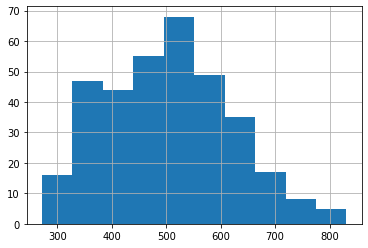

In [ ]:
# plotar histograma de hom_doloso
df.hom_doloso.hist();


No gráfico acima, alguns dados chamam a nossa atenção, como:

* Houveram quase 70 meses com 500-550 homicídios dolosos registrados ao longo do período em estudo.
* Houveram menos de 10 meses ao longo de todo o período estudado na casa de 800 registros de homicídio doloso.

Talvez uma outra visualização possa nos ajudar a aprofundar a análise! Vamos fazer um levantamento em um gráfico de linha.


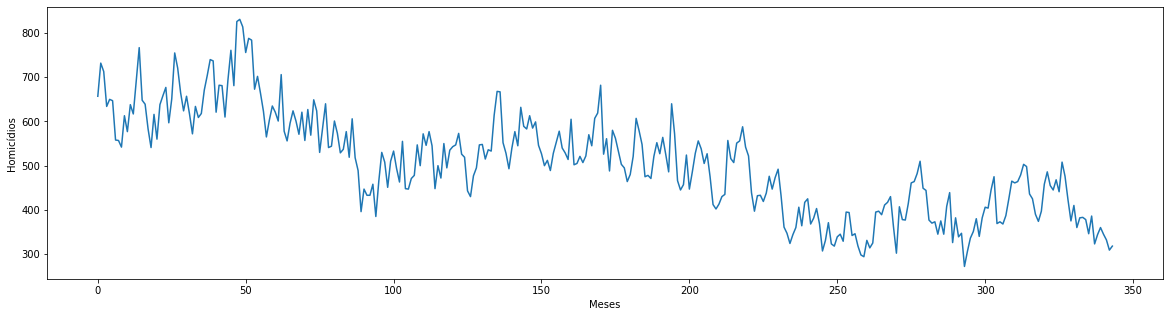

In [ ]:
#plotando em um gráfico de linhas para maior ideia de temporalidade

df.hom_doloso.plot()
plt.xlabel('Meses')
plt.ylabel('Homicídios')
plt.rcParams['figure.figsize'] = (17,5)
plt.show()

Mesmo de forma discreta, é possível notar uma queda na média de casos reportados como homicídio culposo, da data de início da nossa série até o fim dela. 

Uma possível explicação para a diminuição desse tipo de crime é  fato de que, um homicídio não concretizado pode estar sendo contabilizado na variável `tentat_hom`.

Plotando as duas variáveis no mesmo gráfico, veremos se a hipótese está na direção certa

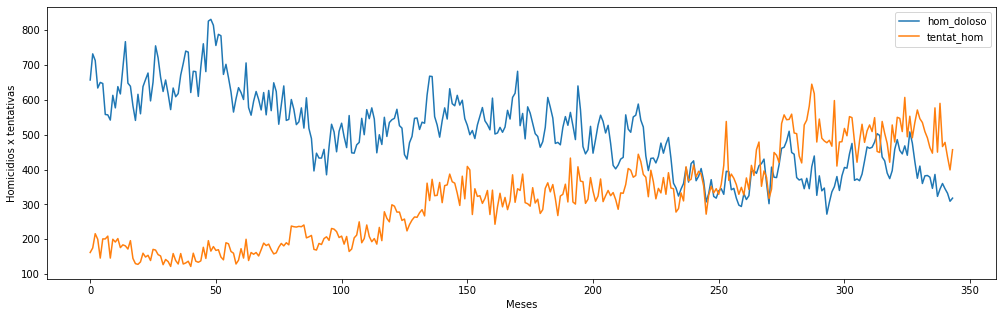

In [ ]:
#plotando no mesmo gráfico o homicidio e as tentativas:

df.hom_doloso.plot()
df.tentat_hom.plot()
plt.xlabel('Meses')
plt.ylabel('Homicidios x tentativas')
plt.legend();

A partir da plotagem das duas variáveis no mesmo gráfico, é possível notar que existe uma queda no registro de homicídios dolosos concomitante ao período que aumenta o volume de tentativas de homicídio. 

Embora seja tentador fazer uma relação entre as duas variáveis, o mais prudente é checar se existe uma correlação entre as demais variáveis envolvidas - não esquecendo, é claro, do possível elemento de erro de cadastro que pode ter ocorrido em qualquer uma das variáveis e torna passível de questionamento nossa análise.

Para fins de exemplificação, vamos utilizar os crimes que tem como principal desfecho negativo direto a morte.

In [ ]:
#lista de todas as colunas para separar as que nos interessam

df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [ ]:
# criar uma matriz de correlação com as variáveis eleitas

corr = df[['hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa',
       'hom_culposo', 'lesao_corp_culposa',
       'encontro_cadaver']].corr()

display(corr)

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,hom_culposo,lesao_corp_culposa,encontro_cadaver
hom_doloso,1.000000,0.314233,0.350517,0.106398,-0.638756,-0.588839,0.321079,0.044835,0.562750
lesao_corp_morte,0.314233,1.000000,0.170049,-0.091644,-0.307632,-0.173575,0.295052,0.065603,0.294070
latrocinio,0.350517,0.170049,1.000000,0.164594,-0.131669,-0.197945,-0.043662,-0.097794,0.168348
hom_por_interv_policial,0.106398,-0.091644,0.164594,1.000000,0.357950,-0.199221,-0.353746,-0.571057,-0.027679
tentat_hom,-0.638756,-0.307632,-0.131669,0.357950,1.000000,0.671085,-0.696509,-0.403973,-0.384032
lesao_corp_dolosa,-0.588839,-0.173575,-0.197945,-0.199221,0.671085,1.000000,-0.245520,0.406628,-0.130267
hom_culposo,0.321079,0.295052,-0.043662,-0.353746,-0.696509,-0.245520,1.000000,0.237362,0.178416
lesao_corp_culposa,0.044835,0.065603,-0.097794,-0.571057,-0.403973,0.406628,0.237362,1.000000,0.217874
encontro_cadaver,0.562750,0.294070,0.168348,-0.027679,-0.384032,-0.130267,0.178416,0.217874,1.000000


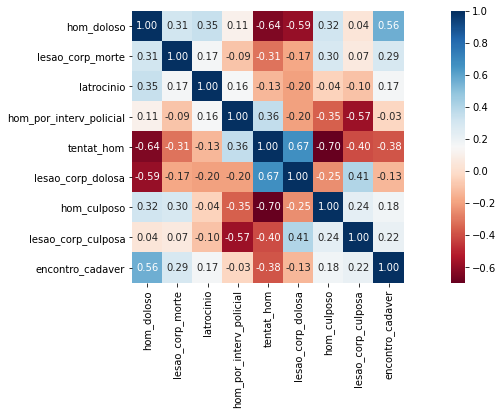

In [ ]:
#plotagem da matriz de correlação em um heatmap para ficar mais didática a visualização

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Entre as correlações mais significantes do dataset, temos que a variável `hom_doloso` apresenta grande interação (negativa) com `tent_hom` e `lesao_corp_culposa`, denotando enquanto uma dessas cresce a outra cai. 

Ainda analisando `hom_doloso`, é possível notar uma relação positiva com a variável `encontro_cadaver`. 

Outra correlação positiva a ser listada é a entre `lesao_corp_dolosa` e `tent_homicidio`.

## Conclusão

A principal lição aprendida aqui foi a necessidade de se atentar a cada detalhe do seu *dataset* quando se está lidando com dados reais, extraídos diretamente de sites e portais com dados abertos. Diferentes de outras bases de dados, a aqui retratada poderia ter valores em branco como dados factíveis - ainda que não tenha sido nossa conclusão ao analisar mais a fundo o *dataset*.

Muitas vezes, nos acostumamos a usar dados de competições ou cursos, que estão perfeitos, e é preciso entender como o aprimoramento de sistemas e ferramentas é benéfico mesmo para os setores públicos no momento de tomada de decisão e divulgação de resultados: embora estejamos ouvindo que existe uma crescente em mortes no estado do RJ, algumas das nossas análises mostraram o oposto. 